Link
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.shape

(2111, 17)

In [27]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [10]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [11]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


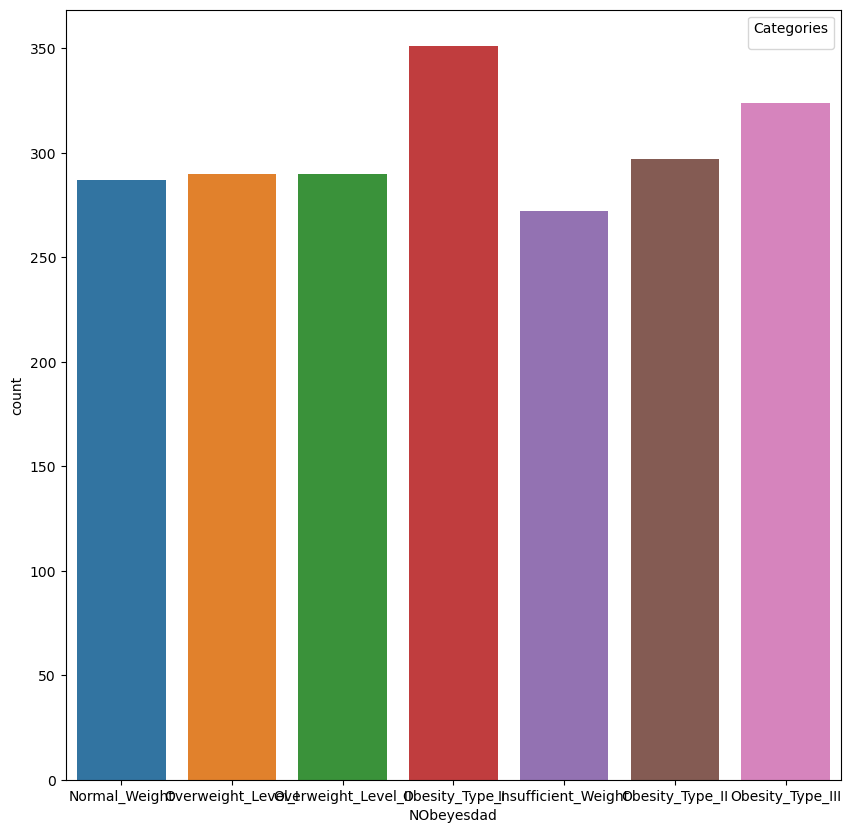

In [12]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='NObeyesdad')
plt.legend(title='Categories')
plt.show()

In [13]:
#Label encoding for all object type columns except target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns.drop('NObeyesdad'):
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

<AxesSubplot:>

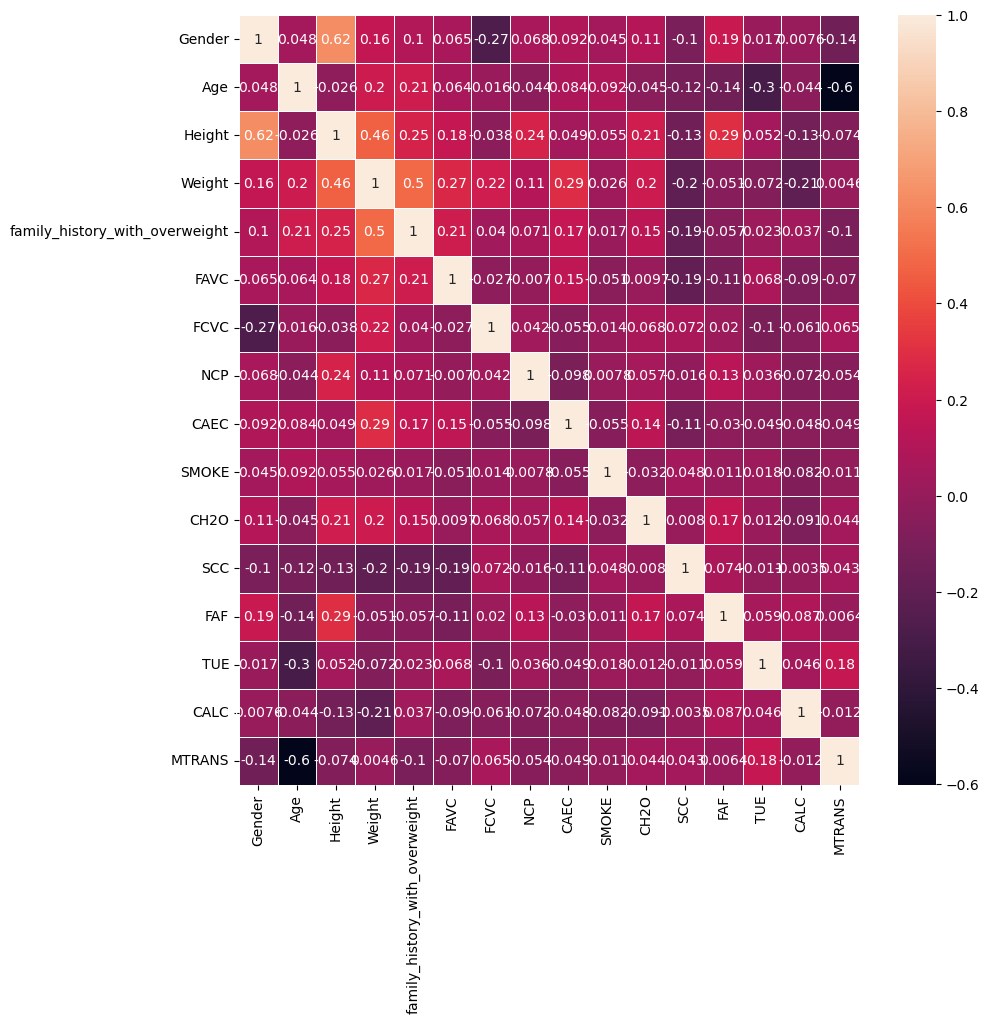

In [17]:
#correlation
fig, ax = plt.subplots(figsize=(10,10))        
# Sample figsize in inches
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax = ax)

In [18]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [19]:
from pycaret.classification import *

setup(data=df,target='NObeyesdad',session_id=123)

compare_models()

,Description,Value
0,Session id,123
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(2111, 17)"
5,Transformed data shape,"(2111, 17)"
6,Transformed train set shape,"(1477, 17)"
7,Transformed test set shape,"(634, 17)"
8,Numeric features,16
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9716,0.9983,0.9716,0.9737,0.9716,0.9668,0.9671,0.3840
catboost,CatBoost Classifier,0.9655,0.9988,0.9655,0.9676,0.9654,0.9597,0.9601,0.2850
gbc,Gradient Boosting Classifier,0.9614,0.9972,0.9614,0.9635,0.9612,0.9550,0.9554,0.4100
rf,Random Forest Classifier,0.9425,0.9964,0.9425,0.9467,0.9427,0.9328,0.9334,0.2380
et,Extra Trees Classifier,0.9316,0.9941,0.9316,0.9371,0.9321,0.9201,0.9209,0.2380
dt,Decision Tree Classifier,0.9147,0.9504,0.9147,0.9188,0.9143,0.9004,0.9012,0.1830
lda,Linear Discriminant Analysis,0.8917,0.9885,0.8917,0.8981,0.8906,0.8735,0.8750,0.1750
knn,K Neighbors Classifier,0.8578,0.9724,0.8578,0.8628,0.8517,0.8339,0.8362,0.1860
lr,Logistic Regression,0.8057,0.9650,0.8057,0.8079,0.8014,0.7731,0.7747,0.8080
ridge,Ridge Classifier,0.6277,0.0000,0.6277,0.6232,0.6052,0.5653,0.5715,0.1710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
#take top 3 models
print('lightgbm')
lightgbm=create_model('lightgbm')

lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9978,0.9730,0.9739,0.9730,0.9684,0.9686
1,0.9730,0.9985,0.9730,0.9744,0.9731,0.9684,0.9686
2,0.9730,0.9998,0.9730,0.9742,0.9729,0.9684,0.9686
3,0.9527,0.9967,0.9527,0.9565,0.9526,0.9448,0.9454
4,0.9865,0.9996,0.9865,0.9877,0.9866,0.9842,0.9844
5,0.9730,0.9997,0.9730,0.9748,0.9728,0.9684,0.9688
6,0.9595,0.9977,0.9595,0.9662,0.9600,0.9526,0.9536
7,0.9728,0.9948,0.9728,0.9734,0.9728,0.9682,0.9683
8,0.9796,0.9991,0.9796,0.9806,0.9796,0.9762,0.9763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

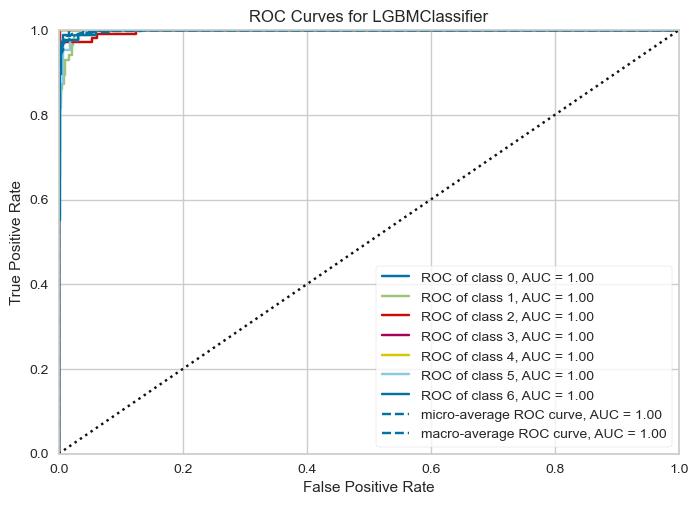

In [21]:
plot_model(lightgbm)

In [28]:
print ('catboost')
cat=create_model('catboost')

catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9662,0.9988,0.9662,0.9671,0.9660,0.9605,0.9607
1,0.9595,0.9994,0.9595,0.9623,0.9597,0.9526,0.9530
2,0.9459,0.9966,0.9459,0.9467,0.9457,0.9368,0.9370
3,0.9392,0.9992,0.9392,0.9467,0.9377,0.9290,0.9305
4,0.9797,0.9988,0.9797,0.9824,0.9800,0.9763,0.9767
5,0.9730,0.9995,0.9730,0.9736,0.9730,0.9684,0.9685
6,0.9595,0.9979,0.9595,0.9608,0.9594,0.9527,0.9529
7,0.9660,0.9987,0.9660,0.9675,0.9661,0.9603,0.9605
8,0.9796,0.9993,0.9796,0.9812,0.9797,0.9762,0.9764


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

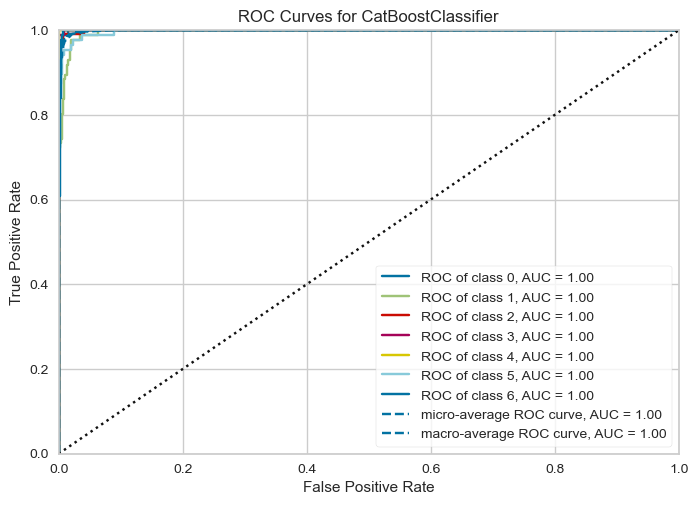

In [23]:
#plot all the plots
plot_model(cat)

In [29]:
print('gbc')
gbc=create_model('gbc')

gbc


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9662,0.9929,0.9662,0.9674,0.9660,0.9605,0.9608
1,0.9527,0.9994,0.9527,0.9563,0.9530,0.9447,0.9452
2,0.9730,0.9980,0.9730,0.9743,0.9726,0.9684,0.9687
3,0.8986,0.9959,0.8986,0.9039,0.8967,0.8816,0.8829
4,0.9865,0.9998,0.9865,0.9871,0.9865,0.9842,0.9843
5,0.9595,0.9979,0.9595,0.9596,0.9589,0.9526,0.9528
6,0.9459,0.9959,0.9459,0.9508,0.9460,0.9368,0.9376
7,0.9728,0.9946,0.9728,0.9738,0.9727,0.9682,0.9684
8,0.9864,0.9992,0.9864,0.9876,0.9864,0.9841,0.9843


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

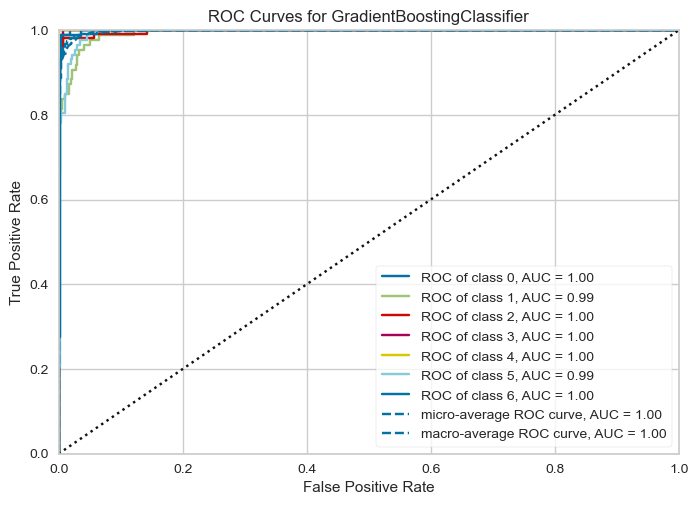

In [25]:
plot_model(gbc)

In [26]:
#since best model is lightgbm, we will tune it
tuned_lightgbm=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9595,0.9979,0.9595,0.9627,0.9593,0.9526,0.9532
1,0.9257,0.9932,0.9257,0.9337,0.9257,0.9131,0.9143
2,0.9527,0.9955,0.9527,0.9528,0.9518,0.9447,0.9450
3,0.9122,0.9953,0.9122,0.9175,0.9121,0.8974,0.8983
4,0.9459,0.9971,0.9459,0.9483,0.9458,0.9369,0.9373
5,0.9392,0.9967,0.9392,0.9415,0.9385,0.9289,0.9295
6,0.9392,0.9952,0.9392,0.9430,0.9397,0.9289,0.9294
7,0.9456,0.9948,0.9456,0.9470,0.9456,0.9364,0.9367
8,0.9252,0.9957,0.9252,0.9363,0.9265,0.9126,0.9142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In conclusion, this code demonstrates the prediction of obesity levels based on eating habits and physical condition using the LightGBM algorithm. We explored the dataset, performed EDA, applied label encoding to categorical variables, and evaluated different classification models. The LightGBM model yielded the highest accuracy, and its performance was further enhanced through hyperparameter tuning.